# Multivariate plots, transformed data

Plotting the raw data, we see that in each case we distinguish (more or less) clearly the three types of flowers. We can therefore conclude that each variable carries information (typically statistical variance) about the type of flower independently.

If we could choose only one variable, it might be the width of the petals, but the results would be far from perfect. In fact, *virginica* and *versicolor* slightly overlap so are not linearly separable. Thus, let's transform variables and apply PCA to solve this.

In [1]:
import pandas as pd

iris = pd.read_csv("../data/iris_cleaned.csv")

## Eighen data

### Raw data

In [2]:
from visualisation import run_pca

_, eighen_vectors, eighen_values = run_pca(iris)

print(eighen_vectors)
print(eighen_values)

[[ 0.36802754 -0.07281766  0.85526243  0.35746258]
 [ 0.68796801  0.69176928 -0.19539941 -0.09987165]
 [-0.5409215   0.6334136   0.05663305  0.55043968]
 [ 0.31410138 -0.33902811 -0.47658992  0.74783843]]
[4.206481   0.21274276 0.07836079 0.02380325]


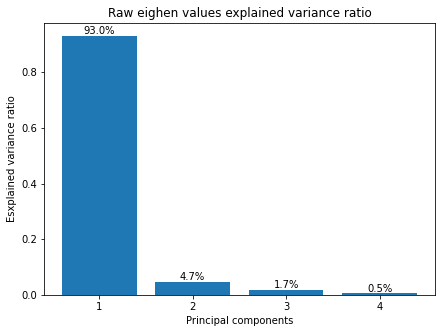

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
bar = plt.bar(
    [str(i+1) for i in range(eighen_values.shape[0])],
    [l/sum(eighen_values) for l in eighen_values], align='center'
)

plt.ylabel("Esxplained variance ratio")
plt.xlabel("Principal components")
plt.title("Raw eighen values explained variance ratio")

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, f"{height*100:.1f}%", ha='center', va='bottom')

### Scaled data

In [4]:
_, eighen_vectors, eighen_values = run_pca(iris, scale=True)

print(eighen_vectors)
print(eighen_values)

[[ 0.526587   -0.25784152  0.58089328  0.56461216]
 [ 0.34715157  0.93442278  0.02740124  0.07475979]
 [-0.72970765  0.21629105  0.14240797  0.63282296]
 [-0.26404294  0.11657615  0.80095702 -0.52455618]]
[2.93241789 0.92140101 0.15256103 0.02120627]


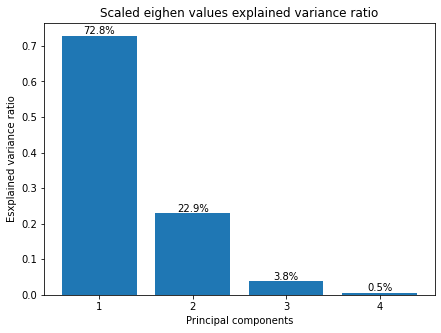

In [5]:
plt.figure(figsize=(7, 5))
bar = plt.bar(
    [str(i+1) for i in range(eighen_values.shape[0])],
    [l/sum(eighen_values) for l in eighen_values], align='center'
)

plt.ylabel("Esxplained variance ratio")
plt.xlabel("Principal components")
plt.title("Scaled eighen values explained variance ratio")

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, f"{height*100:.1f}%", ha='center', va='bottom')

### Raw data, univariate projection

In [6]:
_, eighen_vectors, eighen_values = run_pca(iris, projection="virginica")

print(eighen_vectors)
print(eighen_values)

[[-0.74101679 -0.20328772 -0.62789179 -0.12377451]
 [ 0.16525895 -0.74864279  0.16942776 -0.61928804]
 [-0.53445017 -0.3253749   0.65152357  0.4289653 ]
 [-0.37141165  0.54068405  0.39059336 -0.64587225]]
[0.69525484 0.10655123 0.05229543 0.03426585]


### Scaled data, univariate projection

In [7]:
_, eighen_vectors, eighen_values = run_pca(iris, scale=True, projection="virginica")

print(eighen_vectors)
print(eighen_values)

[[ 0.64008891  0.70406579  0.23658188  0.19648553]
 [ 0.68533357 -0.65924437  0.25417474 -0.17638015]
 [-0.04548534 -0.26212008  0.10754013  0.95794534]
 [ 0.34428937 -0.03132548 -0.93158968  0.11235751]]
[0.99906597 0.36868525 0.08870246 0.02127727]


## Plots

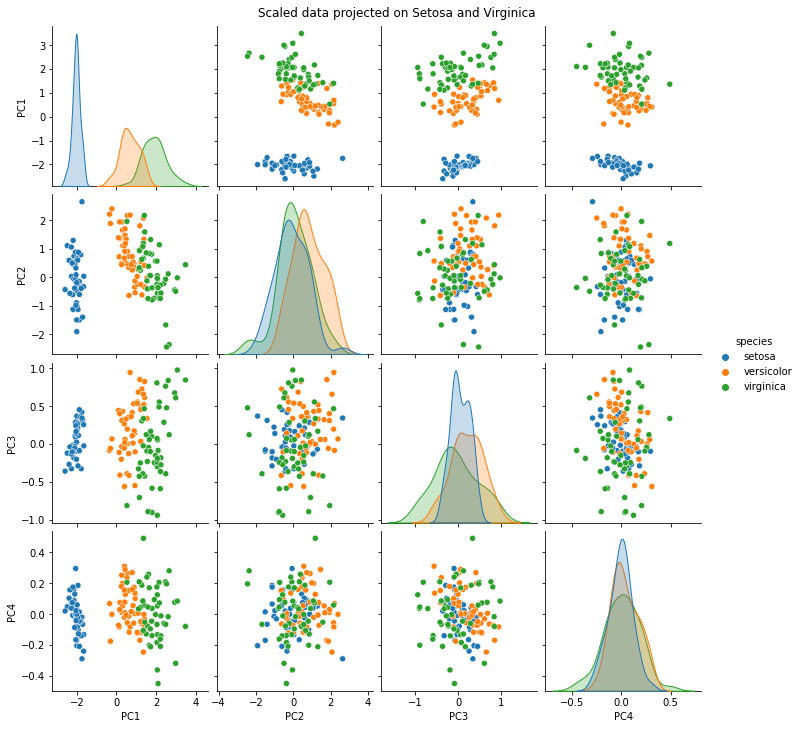

In [8]:
x_transformed, _, eighen_values = run_pca(
    iris, scale=True, projection=("setosa", "virginica"),
    plot=True, title="Scaled data projected on Setosa and Virginica"
)

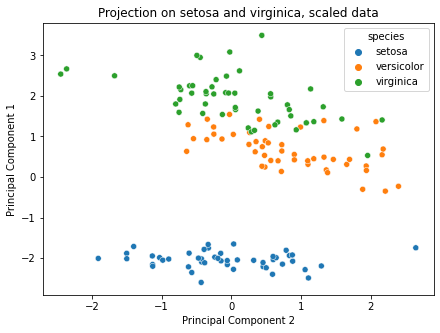

In [9]:
from seaborn import scatterplot

x_transformed = x_transformed.transpose()

plt.figure(figsize=(7, 5))
scatterplot(x=x_transformed[1], y=x_transformed[0], hue=iris['species'])

plt.xlabel("Principal Component 2")
plt.ylabel("Principal Component 1")
plt.title("Projection on setosa and virginica, scaled data")
plt.show()

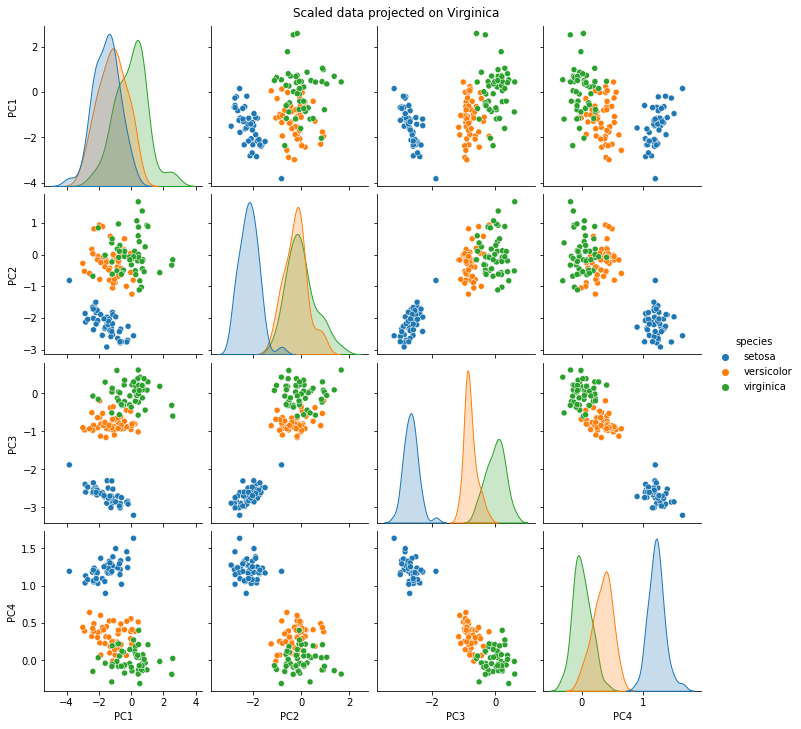

In [10]:
_, _, eighen_values = run_pca(
    iris, scale=True, projection="virginica",
    plot=True, title="Scaled data projected on Virginica"
)